In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

In [2]:
# Definición del dataset
datos = pd.read_csv(filepath_or_buffer="/Users/david/Downloads/diabetes_indiana.csv", sep=',', low_memory=False)

In [3]:
data = datos.values
X, y = data[:, :-1], data[:, -1]

In [4]:
# Separamos los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Definir el modelo
modelo = DecisionTreeClassifier()

In [6]:
# Entrenar el modelo
modelo.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
predicciones = modelo.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predicciones))
print("Confusion Matrix:\n", confusion_matrix(y_test, predicciones))

Accuracy: 0.6883116883116883
Confusion Matrix:
 [[70 20]
 [28 36]]


In [8]:
# Definiendo la evaluación
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [9]:
# Definiendo la búsqueda de hiperparámetros
space = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5], 'criterion': ['gini', 'entropy']}
search = GridSearchCV(modelo, space, scoring='accuracy', n_jobs=-1, cv=cv)

In [10]:
# Ejecutando la búsqueda
result = search.fit(X_train, y_train)

In [11]:
# Mostrando resultados de la búsqueda
print('Best Score:', result.best_score_)
print('Best Hyperparameters:', result.best_params_)

Best Score: 0.7545919266701921
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [12]:
# Optimización del modelo con los mejores hiperparámetros
modelo_optimizado = DecisionTreeClassifier(**result.best_params_)
modelo_optimizado.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [13]:
predicciones_optimizadas = modelo_optimizado.predict(X_test)
print("Accuracy (modelo optimizado):", accuracy_score(y_test, predicciones_optimizadas))
print("Confusion Matrix (modelo optimizado):\n", confusion_matrix(y_test, predicciones_optimizadas))
print("Classification Report (modelo optimizado):\n", classification_report(y_test, predicciones_optimizadas))

Accuracy (modelo optimizado): 0.6883116883116883
Confusion Matrix (modelo optimizado):
 [[78 12]
 [36 28]]
Classification Report (modelo optimizado):
               precision    recall  f1-score   support

         0.0       0.68      0.87      0.76        90
         1.0       0.70      0.44      0.54        64

    accuracy                           0.69       154
   macro avg       0.69      0.65      0.65       154
weighted avg       0.69      0.69      0.67       154



In [14]:
# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


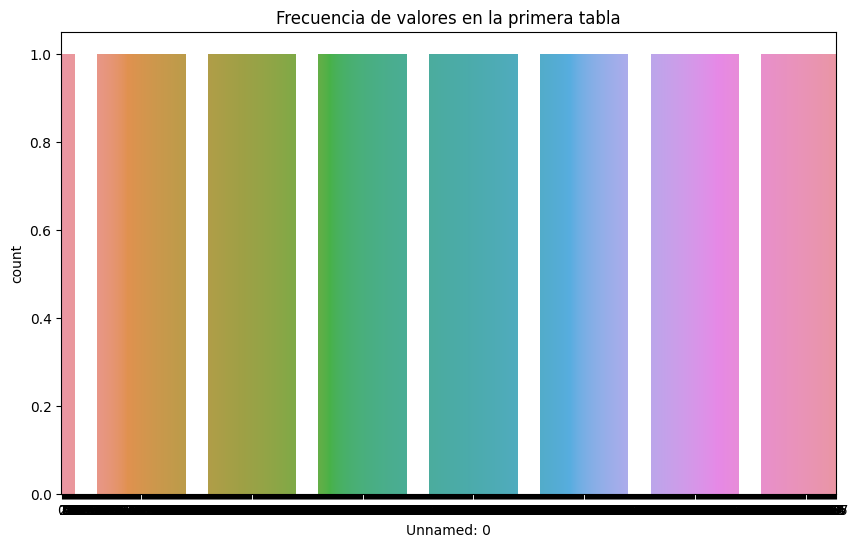

In [17]:
# Gráfica de barras para la primera tabla (Unnamed 0)
plt.figure(figsize=(10, 6))
sns.countplot(x='Unnamed: 0', data=datos)
plt.title('Frecuencia de valores en la primera tabla')
plt.show()

C:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


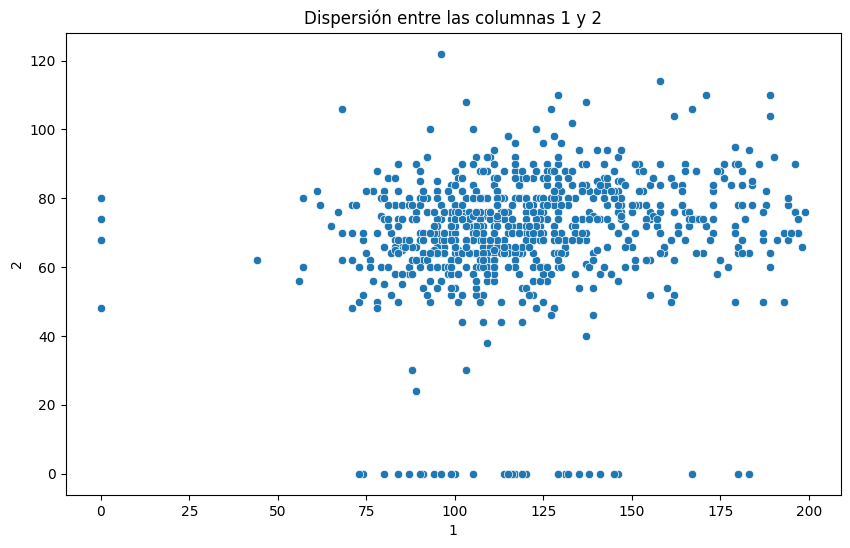

In [18]:
# Gráfica de dispersión para la segunda tabla
plt.figure(figsize=(10, 6))
sns.scatterplot(x='1', y='2', data=datos)
plt.title('Dispersión entre las columnas 1 y 2')
plt.show()